# РК№2

**Задание.** Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

In [32]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('impeachment-polls.csv')

In [3]:
data.head()

,Start,End,Pollster,Sponsor,SampleSize,Pop,tracking,Text,Category,Include?,...,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Sample,Ind Yes,Ind No,URL,Notes
0,6/28/2019,7/1/2019,ABC News/Washington Post,NaN,1008,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,87.0,292.0,61.0,36.0,373.0,37.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN
1,4/22/2019,4/25/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,10.0,87.0,290.0,62.0,29.0,360.0,36.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN
2,1/21/2019,1/24/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,90.0,320.0,64.0,30.0,370.0,42.0,53.0,langerresearch.com/wp-content/uploads/1204a2Tr...,NaN
3,8/26/2018,8/29/2018,ABC News/Washington Post,NaN,1003,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,15.0,82.0,331.0,75.0,21.0,371.0,49.0,46.0,https://www.langerresearch.com/wp-content/uplo...,NaN
4,6/8/2019,6/12/2019,Civiqs,NaN,1559,rv,NaN,Do you think the House of Representatives shou...,begin_inquiry,yes,...,5.0,93.0,577.0,77.0,15.0,499.0,41.0,53.0,https://civiqs.com/documents/Civiqs_DailyKos_m...,NaN


Оцени количество пропущенных значений в каждом поле.

In [4]:
data.isnull().sum()

In [5]:
data.shape

(542, 24)

Посмотрим типы данных в исходном датасете.

In [6]:
data.dtypes

### Выполним предобработку данных.

Посмотрим в каких полях (числовой тип данных) есть пропущенные значения, а также посмотрим на их количество.

In [7]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Unsure. Тип данных float64. Количество пустых значений 21, 3.87%.
Колонка Rep Sample. Тип данных float64. Количество пустых значений 67, 12.36%.
Колонка Rep Yes. Тип данных float64. Количество пустых значений 33, 6.09%.
Колонка Rep No. Тип данных float64. Количество пустых значений 50, 9.23%.
Колонка Dem Sample. Тип данных float64. Количество пустых значений 65, 11.99%.
Колонка Dem Yes. Тип данных float64. Количество пустых значений 27, 4.98%.
Колонка Dem No. Тип данных float64. Количество пустых значений 51, 9.41%.
Колонка Ind Sample. Тип данных float64. Количество пустых значений 133, 24.54%.
Колонка Ind Yes. Тип данных float64. Количество пустых значений 95, 17.53%.
Колонка Ind No. Тип данных float64. Количество пустых значений 112, 20.66%.


In [8]:
data_num = data[num_cols]
data_num

,Unsure,Rep Sample,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Sample,Ind Yes,Ind No
0,4.0,232.0,7.0,87.0,292.0,61.0,36.0,373.0,37.0,59.0
1,6.0,260.0,10.0,87.0,290.0,62.0,29.0,360.0,36.0,59.0
2,6.0,240.0,7.0,90.0,320.0,64.0,30.0,370.0,42.0,53.0
3,5.0,251.0,15.0,82.0,331.0,75.0,21.0,371.0,49.0,46.0
4,5.0,483.0,5.0,93.0,577.0,77.0,15.0,499.0,41.0,53.0
...,...,...,...,...,...,...,...,...,...,...
537,7.0,641.0,15.0,80.0,765.0,84.0,11.0,587.0,45.0,42.0
538,NaN,641.0,13.0,82.0,765.0,84.0,11.0,587.0,45.0,42.0
539,5.0,300.0,NaN,91.0,320.0,84.0,NaN,310.0,45.0,50.0
540,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построим гистограмму по признакам.

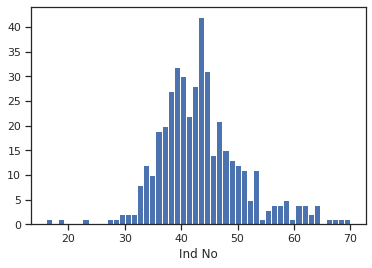

In [9]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Заполним пустые значения разными стратегиями.

In [10]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
for column in ["Rep Yes", "Rep No", "Ind Yes", "Ind No"]:
    imp_mean.fit(data[[column]])
    data[column] = imp_mean.transform(data[[column]])

In [11]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
for column in ["Unsure", "Dem Yes", "Dem No", "Ind Sample"]:
    imp_median.fit(data[[column]])
    data[column] = imp_median.transform(data[[column]])

In [12]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for column in ["Rep Sample", "Dem Sample"]:
    imp_most_frequent.fit(data[[column]])
    data[column] = imp_most_frequent.transform(data[[column]])

Посмотрим в каких категориальных признаках есть пропущенные значения, а также посмотрим на их количество.

In [14]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Sponsor. Тип данных object. Количество пустых значений 266, 49.08%.
Колонка tracking. Тип данных object. Количество пустых значений 428, 78.97%.
Колонка Text. Тип данных object. Количество пустых значений 1, 0.18%.
Колонка Category. Тип данных object. Количество пустых значений 1, 0.18%.
Колонка URL. Тип данных object. Количество пустых значений 1, 0.18%.
Колонка Notes. Тип данных object. Количество пустых значений 535, 98.71%.


Удалим столбцы, содержание большое количество пропущенных значений.

In [15]:
data = data.drop(columns=["Notes", "tracking"], axis=1)

Заполним категориальные признаки.

In [16]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for column in ["Text", "Category", "URL", "Sponsor"]:
    data[column] = imp.fit_transform(data[[column]])

Проверим, что все значения заполнены.

In [17]:
data.isnull().sum()

Закодируем категориальные признаки.

In [18]:
LE = LabelEncoder()
for column in ["Start", "End", "Pollster", "Sponsor", "Pop", "Text", "Category", "Include?", "URL"]:
    data[column] = LE.fit_transform(data[column])

In [20]:
data.head()

,Start,End,Pollster,Sponsor,SampleSize,Pop,Text,Category,Include?,Yes,...,Rep Sample,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Sample,Ind Yes,Ind No,URL
0,263,257,0,17,1008,0,35,1,1,37.0,...,232.0,7.0,87.0,292.0,61.0,36.0,373.0,37.0,59.0,93
1,228,218,0,17,1001,0,35,1,1,37.0,...,260.0,10.0,87.0,290.0,62.0,29.0,360.0,36.0,59.0,94
2,16,18,0,17,1001,0,35,1,1,40.0,...,240.0,7.0,90.0,320.0,64.0,30.0,370.0,42.0,53.0,306
3,299,283,0,17,1003,0,35,1,1,49.0,...,251.0,15.0,82.0,331.0,75.0,21.0,371.0,49.0,46.0,235
4,271,244,6,17,1559,2,89,0,1,43.0,...,483.0,5.0,93.0,577.0,77.0,15.0,499.0,41.0,53.0,47


Построим корреляционную матрицу.

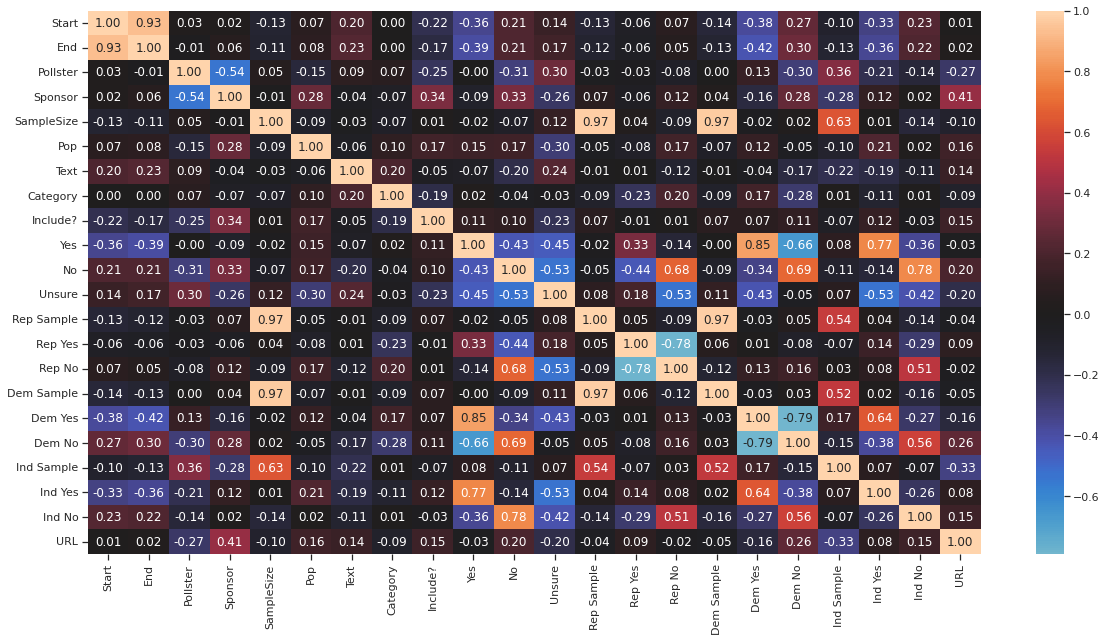

In [21]:

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(method="pearson"), ax=ax,annot=True, fmt=".2f", center=0)

Будем решать задачу регрессии.

In [23]:
data['Yes'].unique()

In [25]:
data_new=data[['Yes','Pop', 'Rep Yes', 'Dem Yes', 'Ind Yes']]

In [26]:
data_new.head()

,Yes,Pop,Rep Yes,Dem Yes,Ind Yes
0,37.0,0,7.0,61.0,37.0
1,37.0,0,10.0,62.0,36.0
2,40.0,0,7.0,64.0,42.0
3,49.0,0,15.0,75.0,49.0
4,43.0,2,5.0,77.0,41.0


### Метод №1: Линейная регрессия

In [27]:
xArray = data_new.drop("Yes", axis=1)
yArray = data_new["Yes"]

Разделим выборку на обучающую и тестовую.

In [28]:
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

Обучим модель.

In [29]:
model1 = LinearRegression(normalize=True)
model1.fit(trainX, trainY)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

Предсказанные значение для тестовой выборки:

In [30]:
y_test_predict_LR = model1.predict(testX)
y_test_predict_LR

Посмотрим результат метрик.

In [31]:
print('MSE:', mean_squared_error(y_test_predict_LR, testY))
print('MAE:', (mean_absolute_error(testY, y_test_predict_LR)))

MSE: 5.1305150647967235
MAE: 1.4154756725716189


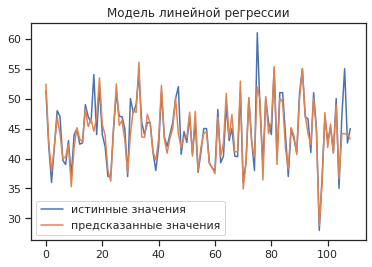

In [86]:
x_ax = range(len(testY))
plt.plot(x_ax, testY, label="истинные значения")
plt.plot(x_ax, y_test_predict_LR, label="предсказанные значения")
plt.title("Модель линейной регрессии")
plt.legend()
plt.show()

### Метод №2: Градиентный бустинг

In [46]:
x_Array = data_new.drop("Yes", axis=1)
y_Array = data_new["Yes"]

Разделим выборку на обучающую и тестовую. 

In [47]:
train_X, test_X, train_Y, test_Y = train_test_split(x_Array, y_Array, test_size=0.2, random_state=1)

Обучим модель.

In [74]:
model2 = XGBRegressor( booster='gbtree', max_depth=4)
model2.fit(train_X, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

После обучения проверим оценку обучения модели.

In [75]:
score = model2.score(train_X, train_Y) 
print("Training score: ", score)

Training score:  0.970765512784494


Предсказанные значения.

In [76]:
y_test_predict_XGBR = model2.predict(test_X)
y_test_predict_XGBR

Посмотрим результат метрик.

In [77]:
print('MSE:', mean_squared_error(y_test_predict_XGBR, test_Y))
print('MAE:', (mean_absolute_error(y_test_predict_XGBR, test_Y)))

MSE: 4.695915081992975
MAE: 1.3921362024709723


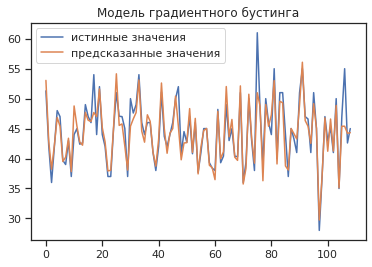

In [85]:
x_ax = range(len(test_Y))
plt.plot(x_ax, test_Y, label="истинные значения")
plt.plot(x_ax, y_test_predict_XGBR, label="предсказанные значения")
plt.title("Модель градиентного бустинга")
plt.legend()
plt.show()

Для решения данной задачи (регрессии) были выбраны две метрики: среднеквадратичная ошибка и средняя абсолютная ошибка. 

Значение метрик для каждой модели близки, но модель градиентного бустинга (библиотека XGBoost) обучилась и предсказала значения лучше, чем модель линейной регрессии. 